# 梯度下降求解线性回归

## NumPy——一元线性回归

### 加载数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
y=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

### 设置超参数

In [3]:
learn_rate=0.00001#步长
iter=100#阶数

display_step=10#每隔10阶显示一次

### 设置模型参数处置

In [4]:
np.random.seed(612)#设置初始w,b值为随机数
w=np.random.randn()
b=np.random.randn()

### 训练模型

i:0,Loss:3874.243711,w:0.082565,b:-1.161967
i:10,Loss:562.072704,w:0.648552,b:-1.156446
i:20,Loss:148.244254,w:0.848612,b:-1.154462
i:30,Loss:96.539782,w:0.919327,b:-1.153728
i:40,Loss:90.079712,w:0.944323,b:-1.153435
i:50,Loss:89.272557,w:0.953157,b:-1.153299
i:60,Loss:89.171687,w:0.956280,b:-1.153217
i:70,Loss:89.159061,w:0.957383,b:-1.153156
i:80,Loss:89.157460,w:0.957773,b:-1.153101
i:90,Loss:89.157238,w:0.957910,b:-1.153048
i:100,Loss:89.157187,w:0.957959,b:-1.152997


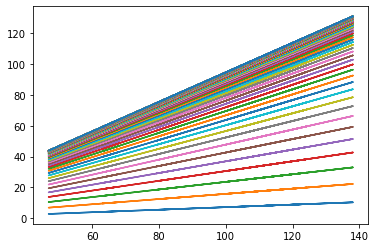

In [5]:
mse=[]

for i in range(0,iter+1):
    
    dL_dw=np.mean(x*(w*x+b-y))#公式
    dL_db=np.mean(w*x+b-y)#公式
    
    w=w-learn_rate*dL_dw#公式
    b=b-learn_rate*dL_db#公式
    
    pred=w*x+b
    Loss=np.mean(np.square(y-pred))/2#公式
    mse.append(Loss)
    
    plt.plot(x,pred)
    
    if i % display_step==0:
        print("i:%i,Loss:%f,w:%f,b:%f"%(i,mse[i],w,b))

### 结果可视化

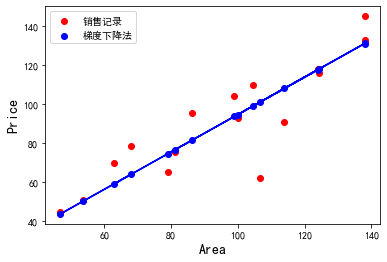

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']

plt.figure()

plt.scatter(x,y,color="red",label="销售记录")
plt.scatter(x,pred,color="blue",label="梯度下降法")
plt.plot(x,pred,color="blue")

plt.xlabel("Area",fontsize=14)
plt.ylabel("Price",fontsize=14)

plt.legend(loc="upper left")
plt.show()

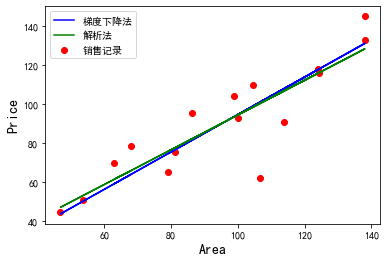

In [7]:
plt.figure()

plt.scatter(x,y,color="red",label="销售记录")
plt.plot(x,pred,color="blue",label="梯度下降法")
plt.plot(x,0.89*x+5.41,color="green",label="解析法")

plt.xlabel("Area",fontsize=14)
plt.ylabel("Price",fontsize=14)

plt.legend(loc="upper left")
plt.show()

### 结果可视化——损失变化

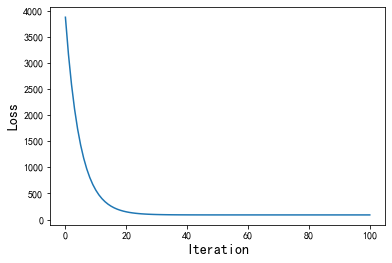

In [8]:
plt.figure()

plt.plot(mse)

plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.show()

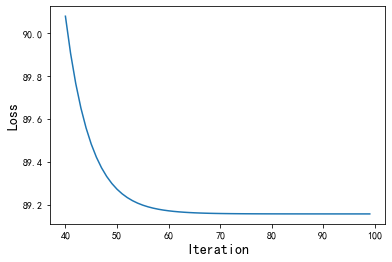

In [9]:
plt.figure()

plt.plot(range(40,100),mse[40:100])

plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.show()

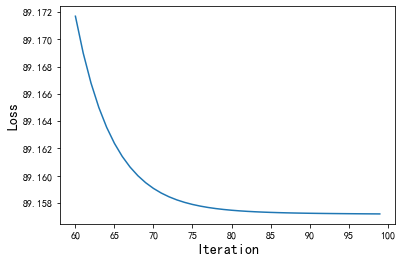

In [10]:
plt.figure()

plt.plot(range(60,100),mse[60:100])

plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.show()

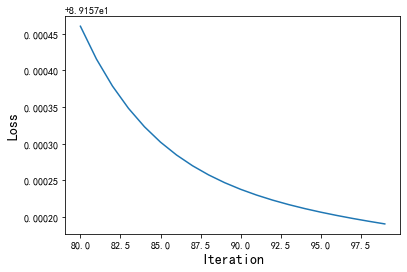

In [11]:
plt.figure()

plt.plot(range(80,100),mse[80:100])

plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.show()

### 估计值&标签值

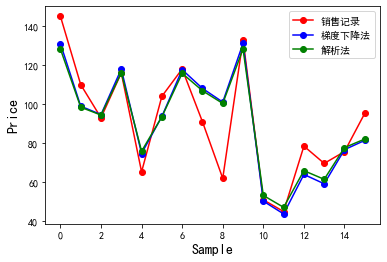

In [12]:
plt.plot(y,color="red",marker="o",label="销售记录")
plt.plot(pred,color="blue",marker="o",label="梯度下降法")
plt.plot(0.89*x+5.41,color="green",marker="o",label="解析法")

plt.legend()
plt.xlabel("Sample",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.show()

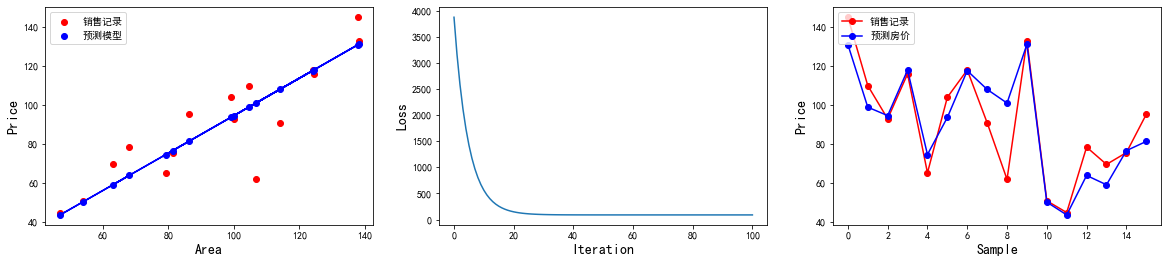

In [13]:
plt.rcParams['font.sans-serif']=['SimHei']

plt.figure(figsize=(20,4))

plt.subplot(1,3,1)
plt.scatter(x,y,color="red",label="销售记录")
plt.scatter(x,pred,color="blue",label="预测模型")
plt.plot(x,pred,color="blue")
plt.xlabel("Area",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.legend(loc="upper left")

plt.subplot(1,3,2)
plt.plot(mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.subplot(1,3,3)
plt.plot(y,color="red",marker="o",label="销售记录")
plt.plot(pred,color="blue",marker="o",label="预测房价")
plt.legend()
plt.xlabel("Sample",fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.legend(loc="upper left")

plt.show()

## NumPy——多元线性回归

### 线性归一化——将所有数据映射到[0,1]之间

In [14]:
import numpy as np

In [15]:
area=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
room=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
#=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

In [16]:
x1=(area-area.min())/(area.max()-area.min())
x2=(room-room.min())/(room.max()-room.min())

In [17]:
x1,x2

(array([0.99912223, 0.63188501, 0.58251042, 0.84935264, 0.3542901 ,
        0.57153829, 0.84584156, 0.73612025, 0.65591398, 1.        ,
        0.07504937, 0.        , 0.23140224, 0.17676103, 0.37689269,
        0.43120474]),
 array([1. , 0.5, 0.5, 1. , 0. , 0.5, 1. , 0.5, 0.5, 1. , 0. , 0. , 0. ,
        0. , 0.5, 0.5]))

使用梯度下降法求解多元线性回归

1 .加载样本数据 area, room, price

2.数据处理归一化，X，Y

3.设置超参数： 学习率，迭代次数

4.设置模型参数处置 ：W0（w0,w1,w2）

5.训练模型W

6.结果可视化

### 加载数据样本

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SinHei']

In [19]:
area=np.array([137.97,104.50,100.00,124.32,79.20,99.00,124.00,
               114.00,106.69,138.05,53.75,46.91,68.00,63.02,81.26,86.21])
room=np.array([3,2,2,3,1,2,3,2,2,3,1,1,1,1,2,2])
price=np.array([145.00,110.00,93.00,116.00,65.32,104.00,118.00,
                91.00,62.00,133.00,51.00,45.00,78.50,69.65,75.69,95.30])

num=len(area)

### 数据处理

In [20]:
x0=np.ones(num)

x1=(area-area.min())/(area.max()-area.min())
x2=(room-room.min())/(room.max()-room.min())

X=np.stack((x0,x1,x2),axis=1)
Y=price.reshape(-1,1)

In [21]:
X.shape,Y.shape

((16, 3), (16, 1))

### 设置超参数

In [22]:
learn_rate=0.001
iter=500

display_step=50

In [23]:
np.random.seed(612)
W=np.random.randn(3,1)

In [24]:
mse=[]
for i in range(0,iter+1):
    
    dL_dW=np.matmul(np.transpose(X),np.matmul(X,W)-Y)
    W=W-learn_rate*dL_dW
    
    PRED=np.matmul(X,W)
    Loss=np.mean(np.square(Y-PRED))/2
    mse.append(Loss)
    
    if i % display_step == 0:
        print("i: %i, Loss:%f" % (i,mse[i]))

i: 0, Loss:4368.213908
i: 50, Loss:413.185263
i: 100, Loss:108.845176
i: 150, Loss:84.920786
i: 200, Loss:82.638199
i: 250, Loss:82.107310
i: 300, Loss:81.782545
i: 350, Loss:81.530512
i: 400, Loss:81.329266
i: 450, Loss:81.167833
i: 500, Loss:81.037990


### 结果可视化

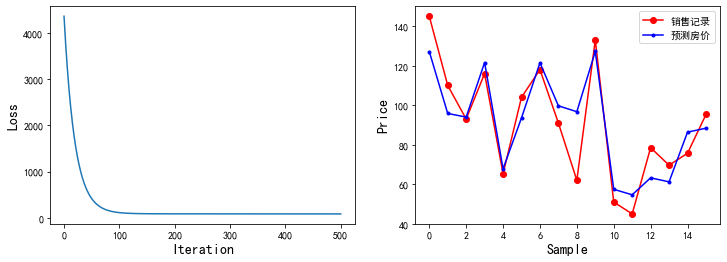

In [30]:
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(mse)
plt.xlabel("Iteration",fontsize=14)
plt.ylabel("Loss",fontsize=14)

plt.subplot(1,2,2)
PRED=PRED.reshape(-1)
plt.plot(price,color="red",marker="o",label="销售记录")
plt.plot(PRED,color="blue",marker=".",label="预测房价")
plt.xlabel("Sample",fontsize=14)
plt.ylabel("Price",fontsize=14)

plt.legend()
plt.show()